# Anomaly detection different aproaches

▪ Describe proximity-based methods for anomaly detection
▪ Apply the k-nearest neighbors algorithm (KNN)
▪ Apply k-means clustering
▪ Apply the local outlier factor (LOF)

▪ Apply linear regression models
▪ Apply principal component analysis (PCA)
▪ Apply one-class support vector machines (SVM)


▪ PCA (principal component analysis)
▪ Grid-based search (beware: combinatorial explosion possible!)
▪ Cluster-based statistics
▪ Random sampling of subspaces

▪ Describe supervised anomaly detection
▪ Implement cost-sensitive learning
▪ Apply adaptive resampling and boosting methods



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [2]:
import sys
visual_path = '../../frameworks/visualization'
sys.path.append(visual_path)

In [3]:
from eda_plots import eda

In [4]:
glob('../../data/1/source_data/clean_data_offer_used*')

['../../data/1/source_data/clean_data_offer_used 2020-10-19 19:12.csv',
 '../../data/1/source_data/clean_data_offer_used 2020-09-04 13:17.csv',
 '../../data/1/source_data/clean_data_offer_used 2020-03-02 20:04.csv',
 '../../data/1/source_data/clean_data_offer_used 2020-10-19 19:10.csv',
 '../../data/1/source_data/clean_data_offer_used 2020-03-03 17:14.csv']

## 1. Look at data

In [5]:
data = pd.read_csv('../../data/1/source_data/clean_data_offer_used 2020-03-03 17:14.csv', index_col=0)

In [6]:
data.head()

,producer,model_name,region,fuel,gear,case,drive_type,color,price,age,kmage,engine_volume,engine_power,offer_count_in_region,lat,lng,norm_adress,macro_name
0,BMW,BMW 1 серия II (F20/F21) 116i,Одинцово,Бензин,автомат,хэтчбек 3 дв.,задний,белый,850000,2012,81000,1.6,136.0,344,55.678859,37.263986,"Одинцово, Московская область, Россия",Московская область
1,BMW,BMW 1 серия I (E81/E82/E87/E88) Рестайлинг 116i,Одинцово,Бензин,автомат,хэтчбек 5 дв.,задний,белый,470000,2011,124000,1.6,115.0,344,55.678859,37.263986,"Одинцово, Московская область, Россия",Московская область
2,BMW,BMW 1 серия I (E81/E82/E87/E88) Рестайлинг 116i,Одинцово,Бензин,автомат,хэтчбек 5 дв.,задний,чёрный,495000,2011,82000,1.6,115.0,344,55.678859,37.263986,"Одинцово, Московская область, Россия",Московская область
3,BMW,BMW 1 серия I (E81/E82/E87/E88) Рестайлинг 120i,Одинцово,Бензин,механика,хэтчбек 3 дв.,задний,белый,385000,2007,170000,2.0,156.0,344,55.678859,37.263986,"Одинцово, Московская область, Россия",Московская область
4,BMW,BMW 3 серия II (E30) 320i,Одинцово,Бензин,механика,седан,задний,чёрный,196000,1985,111111,2.0,125.0,344,55.678859,37.263986,"Одинцово, Московская область, Россия",Московская область


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246249 entries, 0 to 246248
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   producer               246249 non-null  object 
 1   model_name             246249 non-null  object 
 2   region                 246249 non-null  object 
 3   fuel                   246249 non-null  object 
 4   gear                   246249 non-null  object 
 5   case                   246249 non-null  object 
 6   drive_type             246249 non-null  object 
 7   color                  246249 non-null  object 
 8   price                  246249 non-null  int64  
 9   age                    246249 non-null  int64  
 10  kmage                  246249 non-null  int64  
 11  engine_volume          246249 non-null  float64
 12  engine_power           246249 non-null  float64
 13  offer_count_in_region  246249 non-null  int64  
 14  lat                    246247 non-nu

In [7]:
data[data['lat'].isna()]

,producer,model_name,region,fuel,gear,case,drive_type,color,price,age,kmage,engine_volume,engine_power,offer_count_in_region,lat,lng,norm_adress,macro_name
245237,LADA,LADA (ВАЗ) Priora I,Горагорск,Бензин,механика,седан,передний,чёрный,120000,2008,250000,1.6,98.0,1,NaN,NaN,NaN,NaN
245305,LADA,LADA (ВАЗ) Vesta I,Цоцин-Юрт,Бензин,механика,седан,передний,серый,625000,2018,15000,1.6,106.0,1,NaN,NaN,NaN,NaN


In [9]:
data[data['macro_name'].isna()] 

,producer,model_name,region,fuel,gear,case,drive_type,color,price,age,kmage,engine_volume,engine_power,offer_count_in_region,lat,lng,norm_adress,macro_name
215391,BMW,BMW 3 серия VI (F3x) 316i,Чёрная,Бензин,автомат,седан,задний,чёрный,925000,2014,95000,1.6,136.0,3,54.332182,63.097603,река Черная,NaN
215392,Hyundai,Hyundai Solaris I Рестайлинг,Чёрная,Бензин,автомат,седан,передний,белый,380000,2015,263500,1.6,123.0,3,54.332182,63.097603,река Черная,NaN
215393,Volkswagen,Volkswagen Tiguan I,Чёрная,Бензин,автомат,внедорожник 5 дв.,полный,белый,615000,2011,176000,2.0,170.0,3,54.332182,63.097603,река Черная,NaN
223399,BMW,BMW 5 серия VI (F10/F11/F07) 520i,Островцы,Бензин,автомат,седан,задний,синий,1000000,2013,172000,2.0,184.0,13,55.906678,29.393289,озеро Островцы,NaN
223400,Chevrolet,Chevrolet Cruze I Рестайлинг,Островцы,Бензин,механика,седан,передний,белый,360000,2014,218000,1.8,141.0,13,55.906678,29.393289,озеро Островцы,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245734,Toyota,Toyota RAV4 IV (CA40),Чёрное,Бензин,вариатор,внедорожник 5 дв.,полный,красный,1340008,2013,57000,2.0,146.0,2,43.230260,34.187787,Чёрное море,NaN
245748,Nissan,Nissan Almera Classic I,Раздольная,Бензин,механика,седан,передний,чёрный,225000,2006,202000,1.6,107.0,1,43.898834,131.719027,река Раздольная,NaN
245836,Nissan,Nissan Qashqai I,Орловское,Бензин,вариатор,внедорожник 5 дв.,полный,серебристый,450000,2007,135897,2.0,141.0,1,54.637543,65.579863,озеро Орловское,NaN
246036,Toyota,"Toyota Corolla IX (E120, E130) Рестайлинг",Урал,Бензин,механика,универсал 5 дв.,передний,серый,360000,2006,178000,1.4,97.0,1,51.732988,55.641316,река Урал,NaN


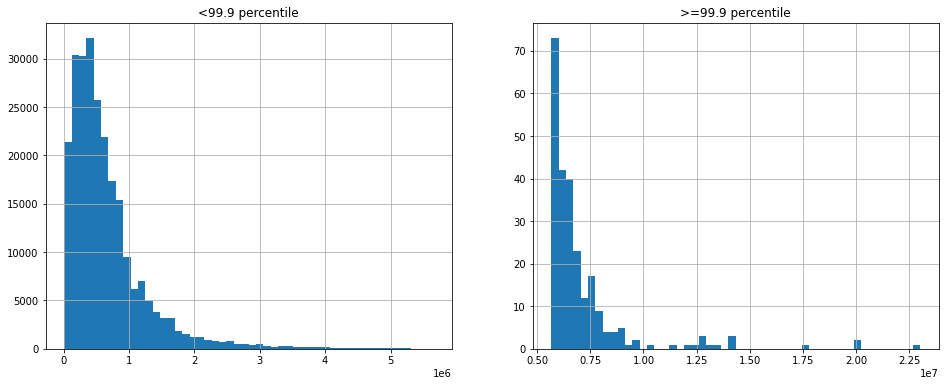

In [8]:
eda.split_hist(data['price'], bins=50, percentile=99.9)

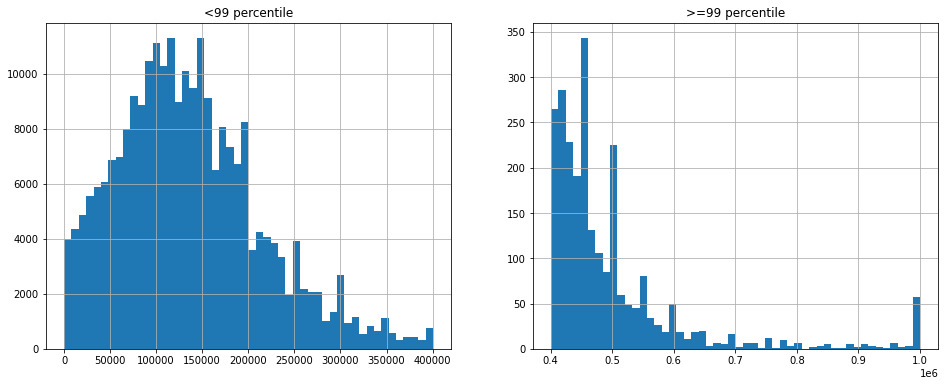

In [9]:
eda.split_hist(data['kmage'], bins=50, percentile=99)

## 2. Prepare features

In [10]:
category_columns = [col_name  for col_name in data.columns if data[col_name].dtype == 'object']
print(category_columns)
numeric_columns = [col_name  for col_name in data.columns if data[col_name].dtype != 'object']
print(numeric_columns)

['producer', 'model_name', 'region', 'fuel', 'gear', 'case', 'drive_type', 'color', 'norm_adress', 'macro_name']
['price', 'age', 'kmage', 'engine_volume', 'engine_power', 'offer_count_in_region', 'lat', 'lng']
